In [1]:
import sys
sys.path.append("../")
import feature_search as fs
from feature_search import fsearch
import score

from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = 16, 5

## Works well at finding objects

In [3]:
im1_name = "../images/trailmix_parent_crop.jpg"
im2_name = "../images/trailmix_child.jpg"

In [4]:
# These are default parameters
rois, images = fsearch(im1_name, im2_name, basic_score_cutoff=15, angle_cutoff=35, overlap_thresh=.3, show_final=False, search_mode='fast')

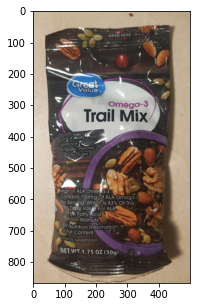

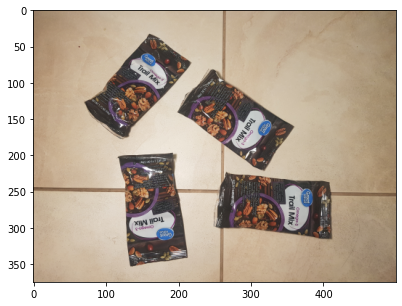

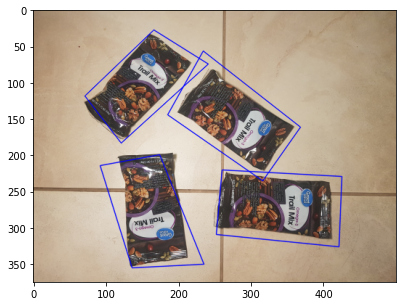

(<matplotlib.image.AxesImage at 0x7f7944ba0a58>, None)

In [5]:
plt.imshow(images['master']), plt.show()
plt.imshow(images['search']), plt.show()
plt.imshow(images['final']), plt.show()

In [6]:
len(rois)

4

## But there can be problems if the objects are too grouped up

This problem is due to the implementation of selective search. Although selective search is based off graph segmentation, which has no concept of bounding rectangles, most implementations of selective search will return a bounding rectangle that is aligned with the x and y axis of the image. This causes boxes to include multiple objects if they are not aligned with the image and are too close together. Perhaps in the future we can add selective search implementation to return a opencv mask and thus not have the problem of this. A quicker and more dirty solution would be to rotate the image 45 degrees and do the process again, after which we would merge the two answers with NMS.

## Even in noisy environments

s search


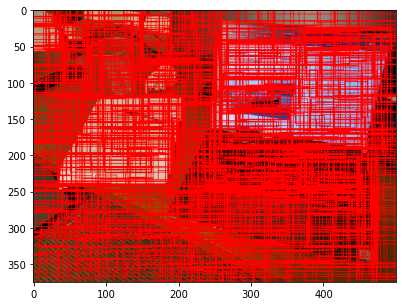

basic_score_cutoff


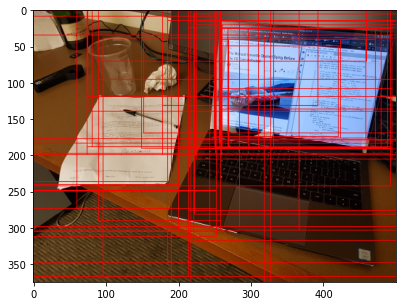

homography


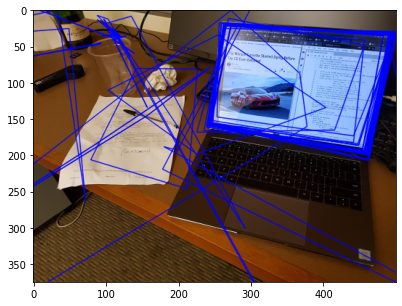

angle cutoff


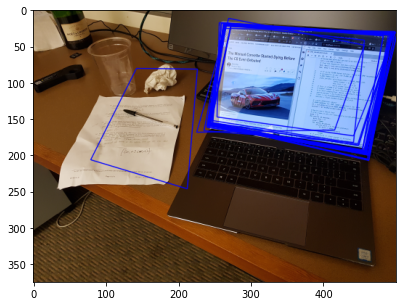

final


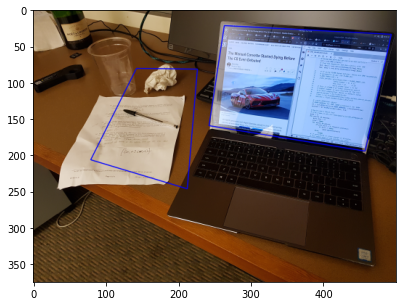

In [7]:
im1_name = "../images/screen.jpg"
im2_name = "../images/find_the_screen.jpg"
rois, images = fsearch(im1_name, im2_name, basic_score_cutoff=60, show=True, matchbox=True)

In [8]:
# plt.rcParams['figure.figsize'] = 20, 10
# for img in images['angle_cutoff_matchboxes']:
#     plt.imshow(img), plt.show()

In [9]:
len(rois)

2

## Even if there are multiple

s search


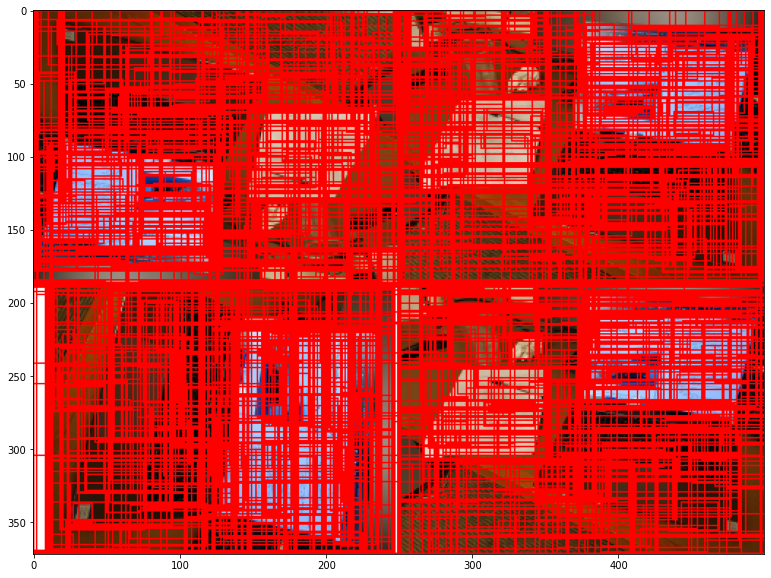

In [4]:
im1_name = "../images/screen.jpg"
im2_name = "../images/find_the_screens.jpg"
images = {}
kp_master, rois = fs.roi_search (im1_name, im2_name, images, show=True)

basic_score_cutoff


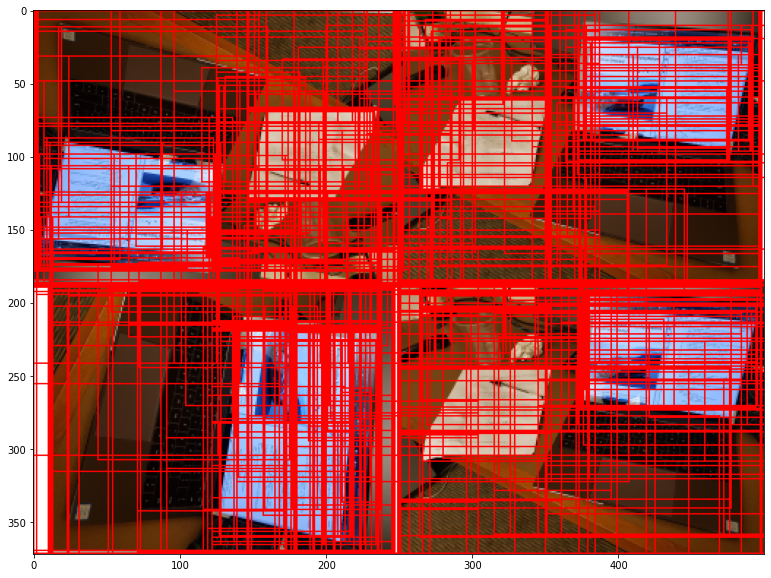

homography


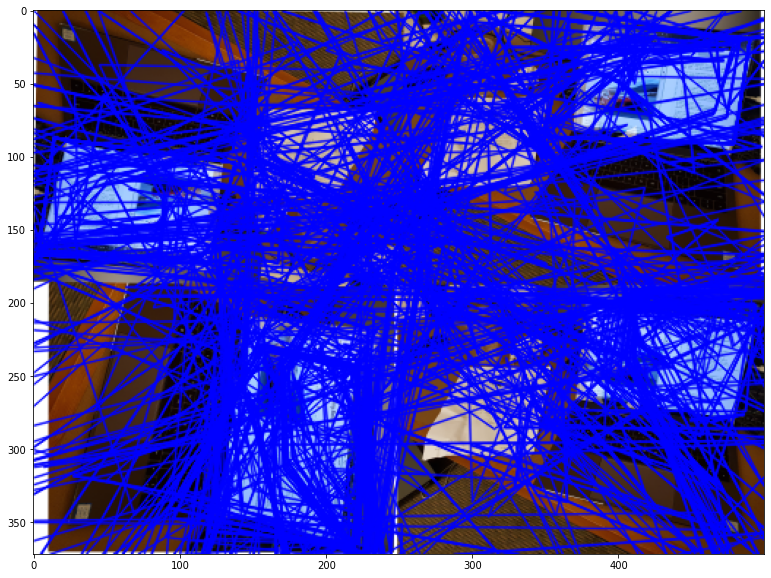

angle cutoff


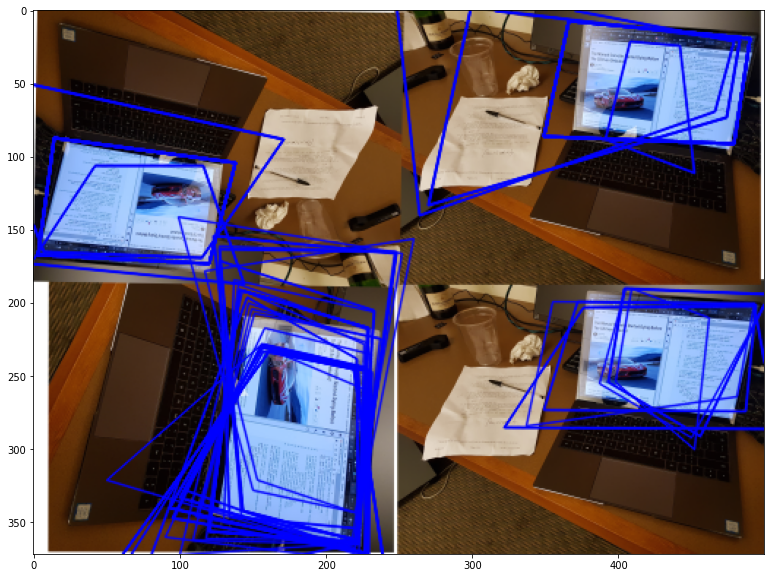

[  0 111  46 133  79  80  81  30  84  88  85  14  68 109  69  35  36 132
  39  42 105 106  57 112 110  28  72  71 107  89  26 131  87  86 127  15
  17  82 130  59  55  90  99  97  56 101  62  64 104 103 102  70  78  60
  63  95  94  23  13  12  25  29  31 123  22 122 128 117  40  41  43  44
   7   6   5 118  11 100  18  19  83 126  75 125  77  76  74  27  33  48
  21  49 113 116 115 114  66  67  65  61  51   2  38  45  96  34  50  52
  53 108  54  16  10 129   9  37 121  32 124   8  93 119  47  58   3  73
  91  92  98 120   4   1  24  20]
final


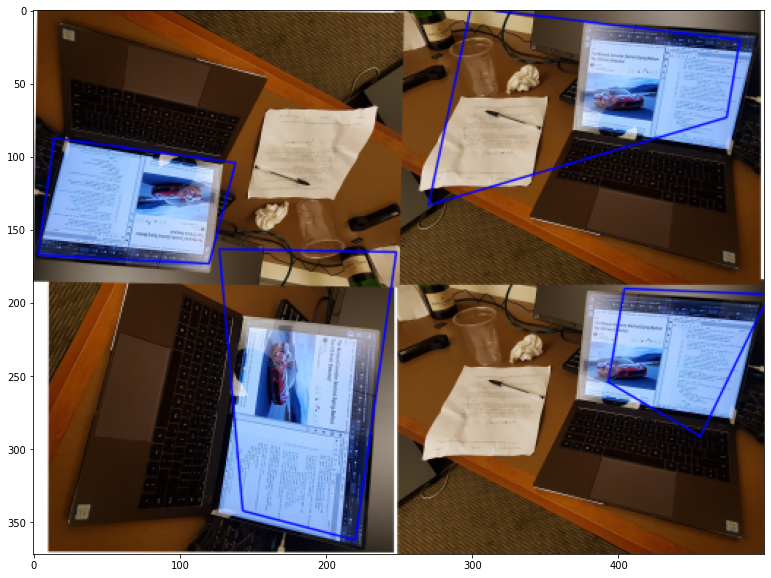

In [5]:
rois_basic = fs.prune (kp_master, rois, images, show=True, matchbox=True)

In [6]:
len(rois[0])

6

In [20]:
score_fn = score.get_score_fn(('mask_basic', 'parallelogram'), (1, 10))

[ 80  14  79  81  30   6  41  63  45 111 133 114 115  65  61 116 113  66
  88  85  84  75  74 124  95  22  23 100  83  77  31  18  32  47  73   8
  98   4   3 120 119   2 108  96 129  48 125 126  33  49   0  46  21 128
   5  56 104  99  67  39  51  76   1  20  24  93  91  92  19  27  11  16
   9  38  52  37  10  34  53  50 112 127  54  13  59  43 122  90 102 103
  97 118 117  55 101  44  40  94  70  29  64  78  60   7  25 123  62  12
 121  36 130 131  35  68  82 110  69  71  72  17  28  26  86  15  87 132
  57 105 106 107  42 109  89  58]
final


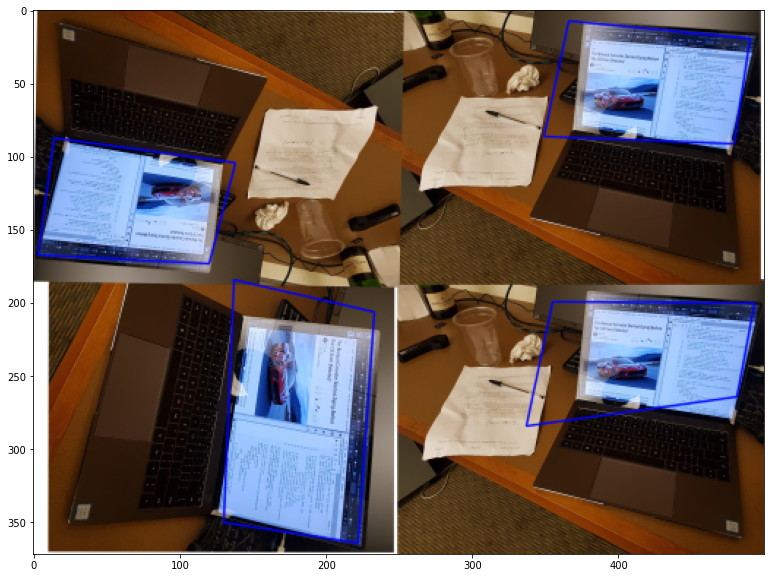

In [21]:
rois_parallelogram = fs.prune (kp_master, rois, images, matchbox=True, score_fn=score._parallelogram_s)

[ 81  80  79  30  14 133 111   6  63  41  88  85  84  46   0  95  22  23
  45  66 116 115 114 113  65  61  75  74  31  39  77 100  83  18 104  99
   5  56 128 127 112  33 126  48  49 125  28  72  71  69  82  86 105  89
  68 106 107 109 110  17 130 131  87 132  15  36  42  57  26  35  21  13
  94 123  97  64   7 102 103 122  44  43  40 101 118  90 117  29  62  25
  70  60  55  59  12  78  76 124  19  27  11  67 108 129   2  96  51  32
  47  73   3 120  98 119   4   8  34  50  37  38  10  52  53   9  16  54
 121  93  92  91   1  20  24  58]
final


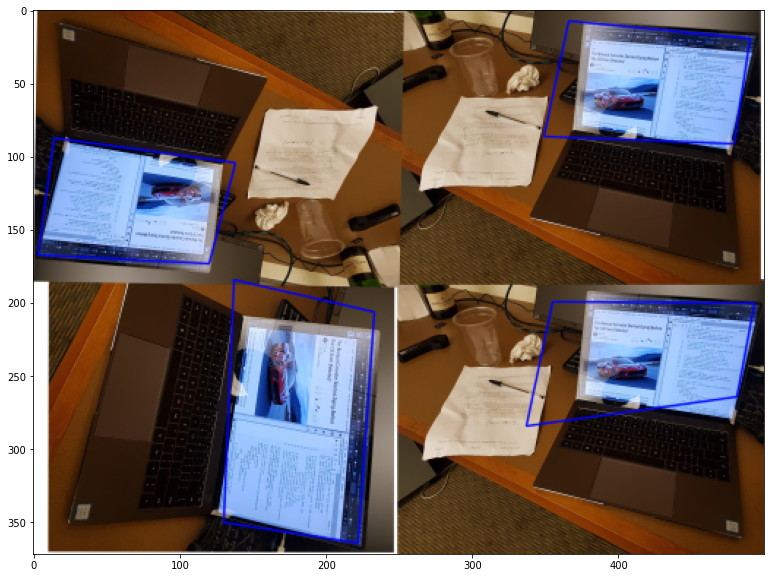

In [22]:
rois_parallelogram = fs.prune (kp_master, rois, images, matchbox=True, score_fn=score_fn)

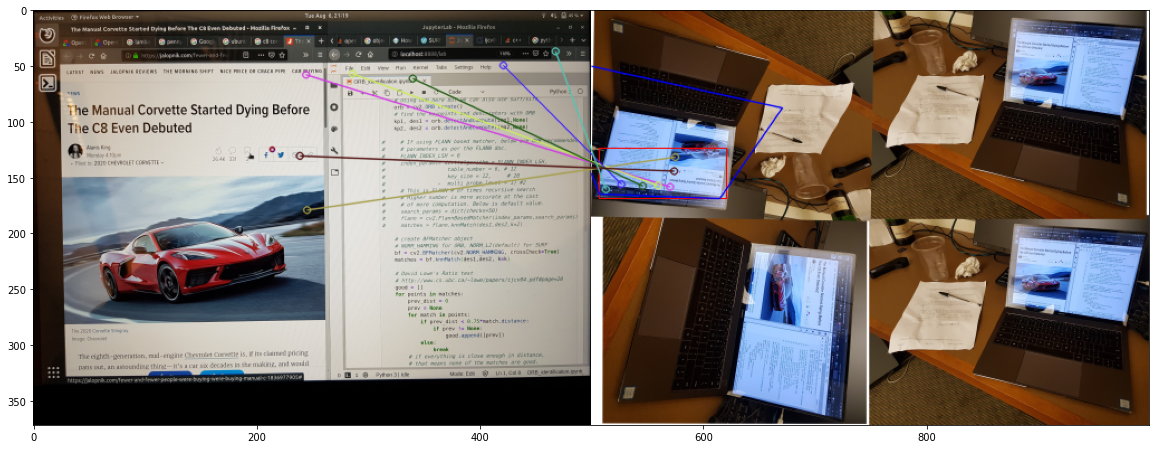

(<matplotlib.image.AxesImage at 0x7f9670537828>, None)

In [15]:
plt.rcParams['figure.figsize'] = 20, 10
plt.imshow(images['angle_cutoff_matchboxes'][79]), plt.show()

In [ ]:
len(rois[0])

In [ ]:
rois[0][5]